<h1>Network Analysis with Python</h1>

<li>Networks are connected bi-directional graphs
<li>Nodes mark the entities in a network
<li>Edges mark the relationships in a network

<h2>Examples of networks</h2>
<li>Facebook friends
<li>Other social networks
<li>transportation networks
<li>Power grids
<li>Internet routers
<li>Activity networks
<li>Many others

<h2>Questions we're interested in</h2>
<li>Shortest path between two nodes
<li>Connectedness
<li>Centrality
<li>Clustering
<li>Communicability

<h1>networkx</h1>
<li>Python package for networks 
<li>Nodes and edges can contain data
<li>Nodes can be (hashable!) python objects

<h3>Constructing a simple network</h3>

<b>Necessary imports</b>

In [1]:
# !pip install networkx
!pip install --user decorator==4.3.0

In [2]:
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

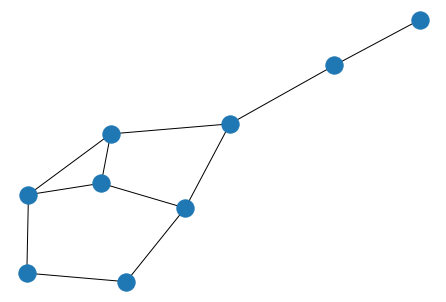

In [3]:
simple_network = nx.Graph()
nodes = [1,2,3,4,5,6,7,8]
edges = [(1,2),(2,3),(1,3),(4,5),(2,7),(1,9),(3,4),(4,5),(4,9),(5,6),(7,8),(8,9)]
# simple_network.add_nodes_from(nodes)
simple_network.add_edges_from(edges)
nx.draw(simple_network)

In [4]:
simple_network.order()

9

<h1>Add labels to the nodes</h1>

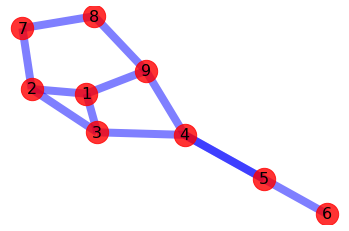

In [5]:
pos=nx.spring_layout(simple_network) # positions for all nodes
# keeps the graph in memory so that you are able to add to it with subsequent code.

# nodes
nx.draw_networkx_nodes(simple_network,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)  - draws the edges of the graph
nx.draw_networkx_edges(simple_network,pos,
                       edgelist=edges,  # edgelist parameter indicates which edges to highlight
                       width=8,alpha=0.5,edge_color='b')
# the edgelist parameter could be a subset of the entire edge set. Indicates which edges to 
# color certain colors to highlight them in the figure.

node_name={}
for node in simple_network.nodes():
    node_name[node]=str(node)

# Draws the actual node labels. It draws the nodes and labels them.
nx.draw_networkx_labels(simple_network,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [6]:
for item in simple_network.adjacency():
    print(item)

(1, {2: {}, 3: {}, 9: {}})
(2, {1: {}, 3: {}, 7: {}})
(3, {2: {}, 1: {}, 4: {}})
(4, {5: {}, 3: {}, 9: {}})
(5, {4: {}, 6: {}})
(7, {2: {}, 8: {}})
(9, {1: {}, 4: {}, 8: {}})
(6, {5: {}})
(8, {7: {}, 9: {}})


In [7]:
simple_network.degree()
# max(list(simple_network.degree()),key=lambda x : x[1])

DegreeView({1: 3, 2: 3, 3: 3, 4: 3, 5: 2, 7: 2, 9: 3, 6: 1, 8: 2})

In [8]:
max(list(simple_network.degree()),key=lambda x : x[1])

(1, 3)

In [9]:
from networkx.algorithms.clique import find_cliques
# find_cliques(simple_network)
i=0
for clique in find_cliques(simple_network):
    print(clique)
    i+=1
    if i > 20: #Too many cliques. Will crash the notebook if we don't stop it
        break

[1, 9]
[1, 2, 3]
[4, 9]
[4, 3]
[4, 5]
[5, 6]
[7, 8]
[7, 2]
[8, 9]


In [10]:
list(simple_network.adjacency())

[(1, {2: {}, 3: {}, 9: {}}),
 (2, {1: {}, 3: {}, 7: {}}),
 (3, {2: {}, 1: {}, 4: {}}),
 (4, {5: {}, 3: {}, 9: {}}),
 (5, {4: {}, 6: {}}),
 (7, {2: {}, 8: {}}),
 (9, {1: {}, 4: {}, 8: {}}),
 (6, {5: {}}),
 (8, {7: {}, 9: {}})]

<h4>Simple queries on the network</h4>

In [11]:
print(simple_network.has_edge(2,9))
print(simple_network.has_node(2))
print(simple_network.number_of_edges())
print(simple_network.number_of_nodes())
print(simple_network.order())
print(len(simple_network))

False
True
11
9
9
9


<h3>Iterating over a network</h3>

<h4>Iterate over the nodes</h4>

In [12]:
for n in simple_network.nodes():
    print(n)

1
2
3
4
5
7
9
6
8


<h4>Iterate over the edges</h4>

In [13]:
for e in simple_network.edges():
    print(e)

(1, 2)
(1, 3)
(1, 9)
(2, 3)
(2, 7)
(3, 4)
(4, 5)
(4, 9)
(5, 6)
(7, 8)
(9, 8)


<h4>Iterate over nodes and degrees</h4>

In [14]:
for d in simple_network.degree():
    print(d)

(1, 3)
(2, 3)
(3, 3)
(4, 3)
(5, 2)
(7, 2)
(9, 3)
(6, 1)
(8, 2)


<h3>Types of graph</h3>


In [15]:
G = nx.Graph() #Undirected simple graph
d = nx . DiGraph () #directed simple graph
m = nx . MultiGraph () #undirected with parallel edges
h = nx . MultiDiGraph () #directed with parallel edges

<h4>Shortest path</h4>

In [16]:
print(nx.shortest_path(simple_network,6,8))   # shortest path is always going to be a list of nodes
print(nx.shortest_path_length(simple_network,6,8)) # returns number of edges on the shortest path.

[6, 5, 4, 9, 8]
4


<h2>Weighted Edges</h2>
<li>Example: A network of travel times between locations

<h4>We will construct a simple graph with distances between nearby locations</h4>


In [17]:
# The first element of each tuple is the label of the node. The second element of the tuple is
# the attribute of the node; for instance what it would show if you hovered the mouse over it.
address_list = [
    ('A',"Columbia University, New York, NY"),  
    ('B',"Arco Cafe, Amsterdam Avenue, New York, NY"),
    ('C',"Riverside Church, New York, NY"),
    ('D',"Columbia Presbytarian Medical Center, New York, NY"),
    ('E',"Amity Hall Uptown, Amsterdam Avenue, New York, NY"),
    ('F',"Ellington in the Park, Riverside Drive, New York, NY"),
    ('G','Nicholas Roerich Museum, West 107th Street, New York, NY'),
    ('H','Audubon Terrace, Broadway, New York, NY'),
]

In [18]:
distances = [
    ['A','B',10],
    ['A','C',5],
    ['A','D',25],
    ['A','E',7],
    ['A','G',12],
    ['B','E',3],
    ['B','G',4],
    ['D','H',5],
    ['D','C',22],
    ['D','E',21],
    ['H','E',35]
]

<h3>Construct a graph with node labels and edge weights</h3>

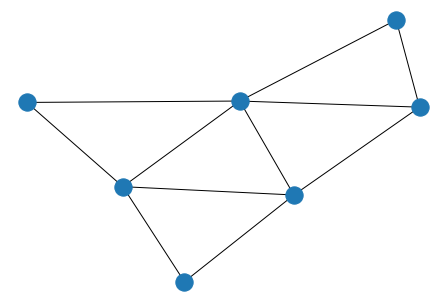

In [19]:
import networkx as nx
%matplotlib inline
G_C=nx.Graph()
node_labels=dict()
nodes = list()

for n in address_list:
    nodes.append(n[0])
    node_labels[n[0]] = n[1] # the second element of the tuple will be the labels (e.g., Columbia University, New York, NY)
for e in distances:
    G_C.add_edge(e[0],e[1],distance=e[2])  # specify the end-points and the distance
nx.draw(G_C)

<h3>Add labels to the graph</h3>

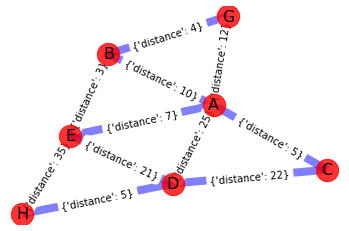

In [20]:
pos=nx.spring_layout(G_C) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_C,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G_C,pos,
                       edgelist=G_C.edges(),
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G_C.nodes():
    node_name[node]=str(node)

nx.draw_networkx_edge_labels(G_C,pos,font_size=10)
node_name={}
for node in G_C.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(G_C,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [21]:
nx.eccentricity(G_C)
list(G_C.adjacency())

[('A',
  {'B': {'distance': 10},
   'C': {'distance': 5},
   'D': {'distance': 25},
   'E': {'distance': 7},
   'G': {'distance': 12}}),
 ('B', {'A': {'distance': 10}, 'E': {'distance': 3}, 'G': {'distance': 4}}),
 ('C', {'A': {'distance': 5}, 'D': {'distance': 22}}),
 ('D',
  {'A': {'distance': 25},
   'H': {'distance': 5},
   'C': {'distance': 22},
   'E': {'distance': 21}}),
 ('E',
  {'A': {'distance': 7},
   'B': {'distance': 3},
   'D': {'distance': 21},
   'H': {'distance': 35}}),
 ('G', {'A': {'distance': 12}, 'B': {'distance': 4}}),
 ('H', {'D': {'distance': 5}, 'E': {'distance': 35}})]

<h4>Shortest path and shortest duration</h4>

In [22]:
node1 = 'H'   # starting node
node2 = 'E'   # ending node
print(nx.shortest_path(G_C,node1,node2))  # shortest path ignores the edge weights (distances)
print(nx.shortest_path_length(G_C,node1,node2))
print(nx.dijkstra_path(G_C,node1,node2,weight='distance'))  # Dijkstra's considers edge weights
print(nx.dijkstra_path_length(G_C,node1,node2,weight='distance'))

['H', 'E']
1
['H', 'D', 'E']
26


In [23]:
G_C.has_edge('A','H')

False

In [24]:
[print(n1,n2,
       nx.shortest_path_length(G_C,n1,n2),
       nx.shortest_path(G_C,n1,n2),
       nx.dijkstra_path_length(G_C,n1,n2,weight='distance'),
       nx.dijkstra_path(G_C,n1,n2,'distance')
      ) for n1 in G_C.nodes() for n2 in G_C.nodes() if not n1 == n2 and nx.has_path(G_C,n1,n2)]

A B 1 ['A', 'B'] 10 ['A', 'B']
A C 1 ['A', 'C'] 5 ['A', 'C']
A D 1 ['A', 'D'] 25 ['A', 'D']
A E 1 ['A', 'E'] 7 ['A', 'E']
A G 1 ['A', 'G'] 12 ['A', 'G']
A H 2 ['A', 'D', 'H'] 30 ['A', 'D', 'H']
B A 1 ['B', 'A'] 10 ['B', 'A']
B C 2 ['B', 'A', 'C'] 15 ['B', 'A', 'C']
B D 2 ['B', 'A', 'D'] 24 ['B', 'E', 'D']
B E 1 ['B', 'E'] 3 ['B', 'E']
B G 1 ['B', 'G'] 4 ['B', 'G']
B H 2 ['B', 'E', 'H'] 29 ['B', 'E', 'D', 'H']
C A 1 ['C', 'A'] 5 ['C', 'A']
C B 2 ['C', 'A', 'B'] 15 ['C', 'A', 'B']
C D 1 ['C', 'D'] 22 ['C', 'D']
C E 2 ['C', 'A', 'E'] 12 ['C', 'A', 'E']
C G 2 ['C', 'A', 'G'] 17 ['C', 'A', 'G']
C H 2 ['C', 'D', 'H'] 27 ['C', 'D', 'H']
D A 1 ['D', 'A'] 25 ['D', 'A']
D B 2 ['D', 'A', 'B'] 24 ['D', 'E', 'B']
D C 1 ['D', 'C'] 22 ['D', 'C']
D E 1 ['D', 'E'] 21 ['D', 'E']
D G 2 ['D', 'A', 'G'] 28 ['D', 'E', 'B', 'G']
D H 1 ['D', 'H'] 5 ['D', 'H']
E A 1 ['E', 'A'] 7 ['E', 'A']
E B 1 ['E', 'B'] 3 ['E', 'B']
E C 2 ['E', 'A', 'C'] 12 ['E', 'A', 'C']
E D 1 ['E', 'D'] 21 ['E', 'D']
E G 2 ['E', 'A', 'G'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:
for edge in G_C.edges():
    print(edge,G_C.get_edge_data(*edge))  # *edge unpacks the attributes of the edge

('A', 'B') {'distance': 10}
('A', 'C') {'distance': 5}
('A', 'D') {'distance': 25}
('A', 'E') {'distance': 7}
('A', 'G') {'distance': 12}
('B', 'E') {'distance': 3}
('B', 'G') {'distance': 4}
('C', 'D') {'distance': 22}
('D', 'H') {'distance': 5}
('D', 'E') {'distance': 21}
('E', 'H') {'distance': 35}


In [26]:
G_C.edges(data=True)  # another way to get the edge data/attributes. Provides distance info. 
# The default of the data parameter in G.edges is False.

EdgeDataView([('A', 'B', {'distance': 10}), ('A', 'C', {'distance': 5}), ('A', 'D', {'distance': 25}), ('A', 'E', {'distance': 7}), ('A', 'G', {'distance': 12}), ('B', 'E', {'distance': 3}), ('B', 'G', {'distance': 4}), ('C', 'D', {'distance': 22}), ('D', 'H', {'distance': 5}), ('D', 'E', {'distance': 21}), ('E', 'H', {'distance': 35})])

In [27]:
G_C.edges(data=False)   # does not provide distance information

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'G'), ('B', 'E'), ('B', 'G'), ('C', 'D'), ('D', 'H'), ('D', 'E'), ('E', 'H')])

In [28]:
G_C.edges()

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'G'), ('B', 'E'), ('B', 'G'), ('C', 'D'), ('D', 'H'), ('D', 'E'), ('E', 'H')])

In [29]:
# G_C.get_edge_data('A','B')
# G_C.edges()
# G_C.edges(data=True)
# G_C.nodes()
# nx.edges(G_C)
origin = 'B'
destination = 'H'
# nx.dijkstra_path(G_C,origin,destination,weight='distance')

<h2>Graph drawing options</h2>
<li>nltk uses matplotlib to draw graphs
<li>limited, but useful, functionalities
<h3>Let's take a look!</h3>

<b>Differentiating edges by weight</b>

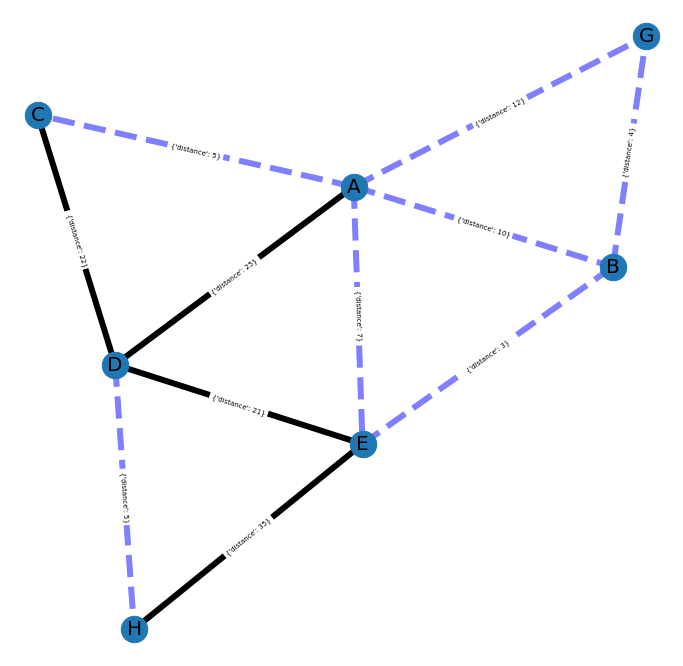

In [30]:
#Divide edges into two groups based on weight
#Easily extendable to n-groups

# pulls out edge (u,v) if distance greater than 15:
elarge=[(u,v) for (u,v,d) in G_C.edges(data=True) if d['distance'] >15] 
# pulling out edge (u,v) if distance less than or equal to 15:
esmall=[(u,v) for (u,v,d) in G_C.edges(data=True) if d['distance'] <=15]

pos=nx.spring_layout(G_C) # positions for all nodes
plt.figure(1,figsize=(12,12)) #Let's draw a big graph so that it is clearer

# nodes
nx.draw_networkx_nodes(G_C,pos,node_size=700)

# edges. draw the larger weight edges in solid lines and smaller weight edges in dashed lines
nx.draw_networkx_edges(G_C,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G_C,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G_C,pos,font_size=20,font_family='sans-serif')

nx.draw_networkx_edge_labels(G_C,pos,font_size=7)

plt.axis('off')
#plt.savefig("address_graph.png") # save as png if you need to use it in a report or web app
plt.show() # display



In [31]:
# nx.clustering(G_C)


<h4>highlight the shortest path</h4>


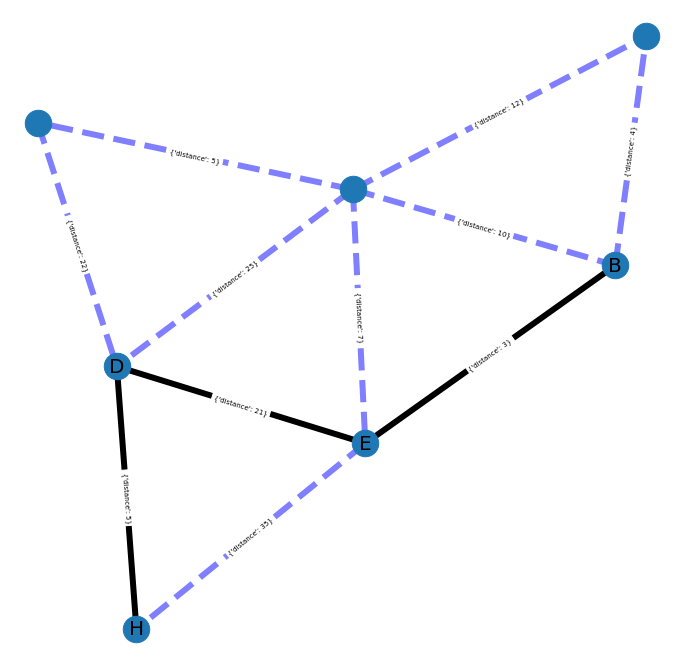

In [32]:
origin = 'B'
destination = 'H'
shortest_path = nx.dijkstra_path(G_C,origin,destination,weight='distance')
shortest_path_edges = list()
for i in range(len(shortest_path)-1):  # n is the number of nodes, n-1 is the number of edges
    shortest_path_edges.append((shortest_path[i],shortest_path[i+1]))
    shortest_path_edges.append((shortest_path[i+1],shortest_path[i]))  
    # A shortest path may have the same edge twice (but swapped in other direction). Hence, the
    # duplicate edge. (Joe: I don't think this is true.)
    
path_edges=list()
other_edges=list()
node_label_list = dict()
node_label_list = {n:'' for n in G_C.nodes()}
for edge in G_C.edges():
    if edge in shortest_path_edges:
        path_edges.append(edge)
        node_label_list[edge[0]] = edge[0]
        node_label_list[edge[1]] = edge[1]
    else:
        other_edges.append(edge)

pos=nx.spring_layout(G_C) # positions for all nodes
fig=plt.figure(1,figsize=(12,12))
# nodes
nx.draw_networkx_nodes(G_C,pos,node_size=700)

# edges. draw the larger weight edges in solid lines and smaller weight edges in dashed lines
nx.draw_networkx_edges(G_C,pos,edgelist=path_edges,
                    width=6)
nx.draw_networkx_edges(G_C,pos,edgelist=other_edges,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels

nx.draw_networkx_labels(G_C,pos,font_size=20,font_family='sans-serif',labels=node_label_list)
nx.draw_networkx_edge_labels(G_C,pos,font_size=7)

plt.axis('off')
#plt.savefig("address_graph.png") # save as png if you need to use it in a report or web app
plt.show() # display


In [33]:
# shortest_path

<b>Question</b> How would you remove edge labels from all but the shortest path?

<h4>Working with a network</h4>


<b>Given an address, generate a <i>sorted by distance</i> list of all other addresses

In [34]:
location = 'G'
distance_list = list()
for node in G_C.nodes():
    if node == location:
        continue
    if not nx.has_path(G_C,location,node):
        continue
    distance = nx.dijkstra_path_length(G_C,location,node,weight='distance')
    distance_list.append((node,distance))
from operator import itemgetter
print(sorted(distance_list,key=itemgetter(1)))

[('B', 4), ('E', 7), ('A', 12), ('C', 17), ('D', 28), ('H', 33)]


<b>Get all paths from one location  to another</b>

In [35]:
list(nx.all_simple_paths(G_C,'A','C'))

[['A', 'B', 'E', 'D', 'C'],
 ['A', 'B', 'E', 'H', 'D', 'C'],
 ['A', 'C'],
 ['A', 'D', 'C'],
 ['A', 'E', 'D', 'C'],
 ['A', 'E', 'H', 'D', 'C'],
 ['A', 'G', 'B', 'E', 'D', 'C'],
 ['A', 'G', 'B', 'E', 'H', 'D', 'C']]

<h2>Social networks</h2><br>
A simple example from yelp user data<br>
Yelp has data on:<br>
    users,<br>
    businesses,<br>
    reviews,<br>
    tips (try the mushroom burger!),<br>
    check-in (special offers from yelp)<br>
We'll focus on the social network of users

<h3>A sample of the network, in graph form, is saved in "friends.pickle"</h3>

In [36]:
G = nx.read_gpickle('friend_graph')
len(G.nodes())

917

<h4>Neighbors of a node</h4>

In [37]:
# G[1]
# G.degree(1)

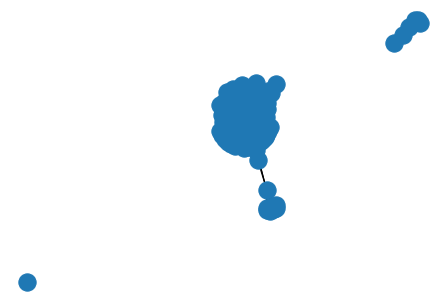

In [38]:
%matplotlib inline
nx.draw(G)

<h4>Let's remove disconnected nodes</h4>


In [39]:
count = 0
for n in G.nodes():
    if G.degree(n) == 0:
        print(n)

112112


In [40]:
nodes_for_removal = [ n for n in G.nodes() if G.degree(n)==0]
nodes_for_removal

[112112]

In [41]:
for node in nodes_for_removal:
    G.remove_node(node)

<ipython-input-42-3a2c2bff1334>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


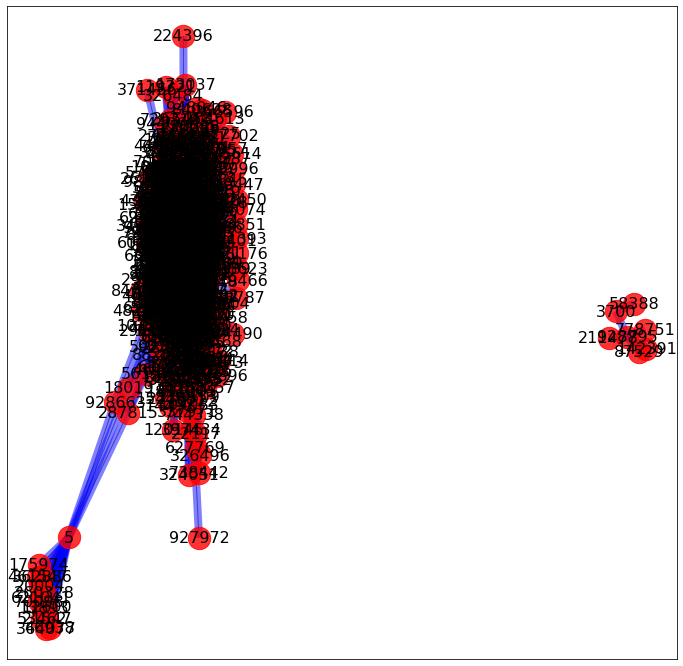

In [42]:
pos=nx.spring_layout(G) # positions for all nodes
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(12,12))
#pos
# nodes
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       width=8,alpha=0.5,edge_color='b')

node_name={}
for node in G.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(G,pos,node_name,font_size=16)

fig.show()

<h3>Start looking at different aspects of the graph</h3>

In [43]:
# nx.shortest_path(G,927972,5)


In [44]:
# nx.shortest_path_length(G,927972,5)


<h3>Graph components</h3>

<li>Let's see the number of connected components
<li>And then each connected component

In [45]:
print(len(list(nx.connected_components(G))))

2


In [46]:
# for comp in nx.connected_components(G):
#     print(comp)

<h4>Largest connected component subgraph</h4>

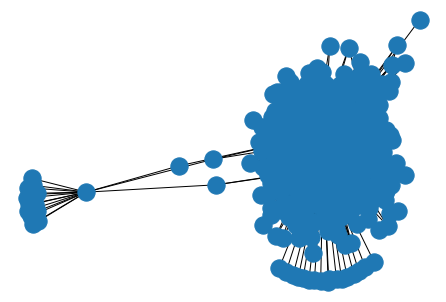

In [47]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)




largest_size=0
largest_graph = None
for g in connected_component_subgraphs(G):
    if len(g) > largest_size:
        largest_size = len(g)
        largest_graph = g
nx.draw(largest_graph)

<h4>Smallest connected component</h4>

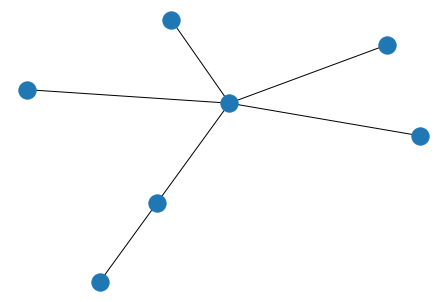

In [48]:
smallest_size=100000
smallest_graph = None
for g in connected_component_subgraphs(G):
    if len(g) < smallest_size:
        smallest_size = len(g)
        smallest_graph = g
nx.draw(smallest_graph)

In [49]:
#Find out node degrees in the graph
# nx.degree(G)

<h4>Max degree. The yelp user with the most friends</h4>

In [50]:
d=nx.degree(G)
l=list(d)
max(l,key=lambda x: x[1])

(1, 841)

<h2>Network analysis algorithms</h2>
https://networkx.github.io/documentation/stable/reference/algorithms/index.html

<h3>Clustering</h3>
Clustering is a measure of how closely knit the nodes in a graph are. We can measure the degree to which a node belongs to a cluster and the degree to which the graph is clustered
- Node clustering coefficient: A measure that shows the degree to which a node belongs to a cluster
- Graph clustering coefficient: A measure that shows the degree to which a graph is clustered

<ipython-input-51-0aec3d7d3e84>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


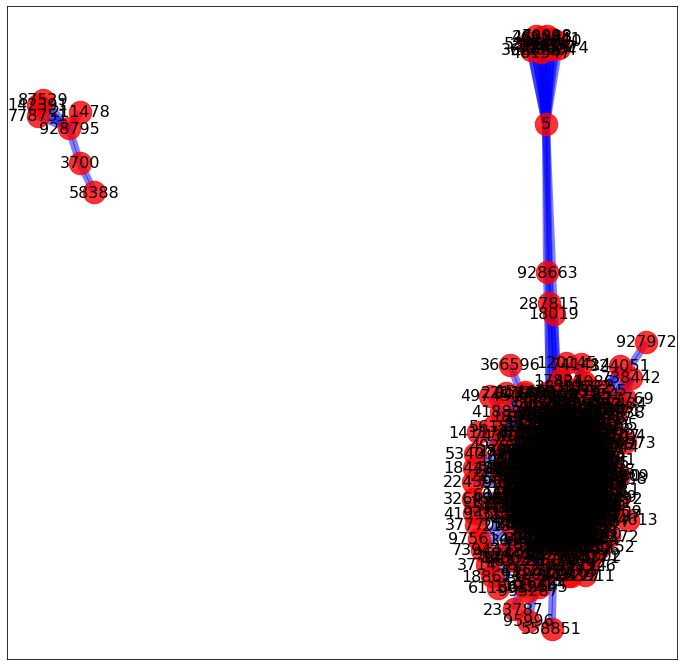

In [51]:
pos=nx.spring_layout(G) # positions for all nodes
fig = plt.figure(1,figsize=(12,12))
#pos
# nodes
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),
                       width=8,alpha=0.5,edge_color='b')

node_name={}
for node in G.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(G,pos,node_name,font_size=16)

fig.show()

In [52]:
# nx.clustering(G)

In [53]:
# nx.average_clustering(G)

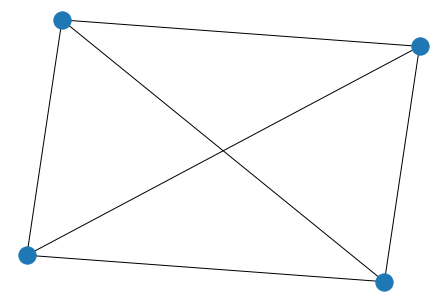

In [54]:
G1=nx.complete_graph(4)
nx.draw(G1)


In [55]:
A = [[0,1,1,1],
    [1,0,1,1],
    [1,1,0,0],
    [1,1,0,0]]

In [56]:
np.dot(A,A)

array([[3, 2, 1, 1],
       [2, 3, 1, 1],
       [1, 1, 2, 2],
       [1, 1, 2, 2]])

In [57]:
nx.clustering(G1)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [58]:
G1.remove_edge(1,2)

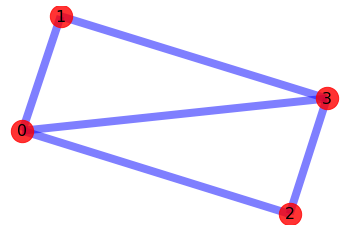

In [59]:
pos=nx.spring_layout(G1) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G1,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G1,pos,
                       edgelist=G1.edges(),
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G1.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G1,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [60]:
nx.clustering(G1)

{0: 0.6666666666666666, 1: 1.0, 2: 1.0, 3: 0.6666666666666666}

## <h4>node 0</h4>
<li>possible triangles through node 0: 
<ol>
<li>(0,1,3)
<li>(0,3,2)
<li>(0,1,2)
</ol>
<li>Since only 2 of the 3 exist, the clustering coefficient is 2/3 or 0.67

In [61]:
nx.average_clustering(G1)

0.8333333333333333

<h3>Clustering in weighted graphs</h3>
<li>geometric average of each subgraph centered at a node

In [62]:
nx.average_clustering(G_C)
nx.average_clustering(G_C,weight='distance')
nx.clustering(G_C,weight='distance')

{'A': 0.12347355351191633,
 'B': 0.1311776879533415,
 'C': 0.40029133295076963,
 'D': 0.2136856015945847,
 'E': 0.1752747696873761,
 'G': 0.2237067223525065,
 'H': 0.44091113830836925}

In [63]:
nx.clustering(G_C)

{'A': 0.4,
 'B': 0.6666666666666666,
 'C': 1.0,
 'D': 0.5,
 'E': 0.5,
 'G': 1.0,
 'H': 1.0}

<h2>Centrality and communicability</h2>
<b>Centrality</b> deals with identifying the most important nodes in a graph<p>
<b>Communicability</b> measures how easy it is to send a message from node i to node j
<li>closeness_centrality: (n-1)/sum(shortest path to all other nodes)
<li>betweenness_centrality: fraction of pair shortest paths that pass through node n
<li>degree centrality: fraction of nodes that n is connected to
<li>communicability: the sum of all walks from one node to every other node

In [64]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import communicability

<h3>Closeness centrality is a measure of how near a node is to every other node in a network</h3>
<h3>The higher the closeness centrality, the more central a node is</h3>
<h3>Roughly, because it can get to more nodes in shorter jumps</h3>

In [65]:
c_c = closeness_centrality(G)

In [66]:
from collections import OrderedDict
cc = OrderedDict(sorted(
                    c_c.items(),
                    key = lambda x: x[1],
                    reverse = True))
# cc

<h3>Understanding closeness centrality</h3>

In [67]:
G1=nx.complete_graph(4)
nx.closeness_centrality(G1)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [68]:
G1.remove_edge(1,2)


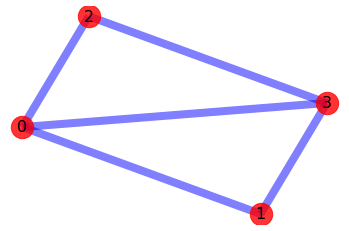

In [69]:
pos=nx.spring_layout(G1) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G1,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G1,pos,
                       edgelist=G1.edges(),
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G1.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G1,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [70]:
nx.closeness_centrality(G1)

{0: 1.0, 1: 0.75, 2: 0.75, 3: 1.0}

<li>n=4
<li>shortest paths from 2 (2-0:1, 2-3:1, 2-1:2) 
<li> (n-1)/sum = 3/4 = 0.75

<h3>Weighted graphs</h3>

In [71]:
nx.closeness_centrality(G_C,distance='distance')

{'A': 0.06741573033707865,
 'B': 0.07058823529411765,
 'C': 0.061224489795918366,
 'D': 0.048,
 'E': 0.07894736842105263,
 'G': 0.0594059405940594,
 'H': 0.04}

In [72]:
nx.closeness_centrality(G_C)

{'A': 0.8571428571428571,
 'B': 0.6666666666666666,
 'C': 0.6,
 'D': 0.75,
 'E': 0.75,
 'G': 0.5454545454545454,
 'H': 0.5454545454545454}

<h2>Communicability</h2>
A measure of the degree to which one node can communicate with another<p>
Takes into account all paths between pairs of nodes<p>
The more paths, the higher the communicability

In [73]:
G1 = nx.Graph([(0,1),(1,2),(1,5),(5,4),(2,4),(2,3),(4,3),(3,6)])
nx.communicability(G1)

{0: {0: 1.6474130416248873,
  1: 1.6400798223827717,
  2: 0.8368311951157532,
  5: 0.7619556594847188,
  4: 0.5201747455605308,
  3: 0.35720896060478313,
  6: 0.07487553563103488},
 1: {0: 1.6400798223827717,
  1: 3.2461998962253613,
  2: 2.5174635285480838,
  5: 2.160254567943301,
  4: 1.9559958152052563,
  3: 1.4318814763073178,
  6: 0.3572089606047827},
 2: {0: 0.8368311951157532,
  1: 2.5174635285480838,
  2: 3.9043895619138786,
  5: 1.8928564307082978,
  4: 3.299674808862183,
  3: 3.1063255926623667,
  6: 1.011533131205581},
 5: {0: 0.7619556594847188,
  1: 2.160254567943301,
  2: 1.8928564307082978,
  5: 2.5473836212375955,
  4: 2.2897500183759907,
  3: 1.3671337510909711,
  6: 0.3454728094707027},
 4: {0: 0.5201747455605308,
  1: 1.9559958152052563,
  2: 3.299674808862183,
  5: 2.2897500183759907,
  4: 3.851377987831617,
  3: 3.096197782247678,
  6: 1.0099247904861919},
 3: {0: 0.35720896060478313,
  1: 1.4318814763073178,
  2: 3.1063255926623667,
  5: 1.3671337510909711,
  4: 3

In [74]:
# G1 = nx.Graph()
# nodes = [0,1,2,3,4,5,6]
# edges = [(0,1),(1,2),(1,5),(5,4),(2,4),(2,3),(4,3),(3,6)]
# # simple_network.add_nodes_from(nodes)
# G1.add_edges_from(edges)

# pos=nx.spring_layout(G1) # positions for all nodes

# # nodes
# nx.draw_networkx_nodes(G1,pos,
#                        node_color='r',
#                        node_size=500,
#                       alpha=0.8)

# # edges
# #nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
# nx.draw_networkx_edges(G1,pos,
#                        edgelist=edges,
#                        width=8,alpha=0.5,edge_color='b')


# node_name={}
# for node in G1.nodes():
#     node_name[node]=str(node)


# nx.draw_networkx_labels(G1,pos,node_name,font_size=16)

# plt.axis('off')
# plt.show() # display

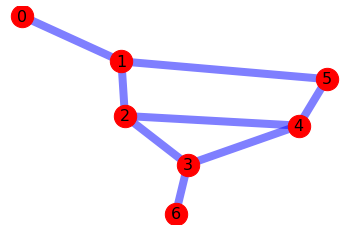

In [75]:
#Define a layout for the graph
pos=nx.spring_layout(G1) # positions for all nodes

# draw the nodes: red, sized, transperancy
nx.draw_networkx_nodes(G1,pos,
                       node_color='r',
                       node_size=500,
                      alpha=1)

# draw the edges
nx.draw_networkx_edges(G1,pos,
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G1.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G1,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [76]:
#Compute the adjacency matrix A for graph above
A = [[0,1,0,0,0,0,0],
    [1,0,1,0,0,1,0],
    [0,1,0,1,1,0,0],
    [0,0,1,0,1,0,1],
    [0,0,1,1,0,1,0],
    [0,1,0,0,1,0,0],
    [0,0,0,1,0,0,0]]
A = np.array(A)

In [77]:
# Number of 3-length paths from i to j is given by the (i,j) element of [AAA]
AA = np.dot(A,A)
AAA = np.dot(AA,A)
AAA # gives number of paths of length 3

array([[0, 3, 0, 1, 2, 0, 0],
       [3, 0, 6, 2, 1, 5, 1],
       [0, 6, 2, 5, 6, 1, 1],
       [1, 2, 5, 2, 5, 2, 3],
       [2, 1, 6, 5, 2, 5, 1],
       [0, 5, 1, 2, 5, 0, 1],
       [0, 1, 1, 3, 1, 1, 0]])

In [78]:
AA

array([[1, 0, 1, 0, 0, 1, 0],
       [0, 3, 0, 1, 2, 0, 0],
       [1, 0, 3, 1, 1, 2, 1],
       [0, 1, 1, 3, 1, 1, 0],
       [0, 2, 1, 1, 3, 0, 1],
       [1, 0, 2, 1, 0, 2, 0],
       [0, 0, 1, 0, 1, 0, 1]])

In [79]:
#Number of 3-length paths from 0 to 1 is 3: (0,1,2,1), (0,1,5,1), (0,1,0,1)

The exponential of A is defined by $e^{A}$ = I + A + $A^{2}$/2! + $A^{3}$/3! +..+ $A^{k}$/k! + ... = $\sum_{i=1}^\infty A^{k}/k!$


Here [$e^{A}$]$_{ii}$ represents node centrality of node i


[$e^{A}$]$_{ij}$ represents communicability from node i to node j

In [80]:
# nx.clustering(G1)

In [81]:
# communicability is the sum of closed walks of different lengths between nodes.
#communicability(G) #Costly operation, we won't do this. Try it at home!
# nx.communicability(G1)

<h2>Betweenness centrality</h2>
<h3>measures of the extent to which a node is connected to other nodes that are not connected to each other. </h3> 
<h3>It’s a measure of the degree to which a node serves as a connector</h3>
<h3>Example: a traffic bottleneck</h3>


<h4>The number of shortest paths that go through node n/total number of shortest paths</h4>

In [82]:
G1=nx.complete_graph(4)
nx.betweenness_centrality(G1)

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}

<h3>When the graph is fully connected, no shortest paths go through the node. So the numerator is zero</h3>

In [83]:
G1.remove_edge(1,2)
nx.betweenness_centrality(G1)

{0: 0.16666666666666666, 1: 0.0, 2: 0.0, 3: 0.16666666666666666}

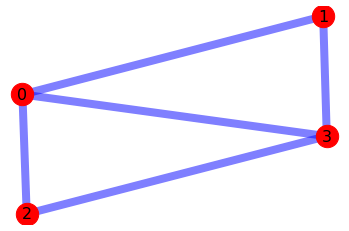

In [84]:
#Define a layout for the graph
pos=nx.spring_layout(G1) # positions for all nodes

# draw the nodes: red, sized, transperancy
nx.draw_networkx_nodes(G1,pos,
                       node_color='r',
                       node_size=500,
                      alpha=1)

# draw the edges
nx.draw_networkx_edges(G1,pos,
                       width=8,alpha=0.5,edge_color='b')


node_name={}
for node in G1.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G1,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

In [85]:
# list(nx.all_pairs_shortest_path(G1))

<li>There are 12 shortest paths in total
<li>Two go through 0 (1, 0, 2) and (2, 0, 1)
<li> Betweeness centrality: 2/12

In [86]:
# nx.betweenness_centrality(G1)

<h3>Betweenness centrality in weighted graphs</h3>

In [87]:
# nx.betweenness_centrality(G_C)

In [88]:
nx.betweenness_centrality(G_C,weight='distance')

{'A': 0.2,
 'B': 0.2,
 'C': 0.0,
 'D': 0.3333333333333333,
 'E': 0.3333333333333333,
 'G': 0.0,
 'H': 0.0}

<h3>Dispersion in fully connected graphs</h3>
<li>Eccentricity: the max distance from one node to all other nodes (least eccentric is more central)
<li>diameter: the max eccentricity of all nodes in a graph (the longest shortest path)
<li>periphery: the set of nodes with eccentricity = diameter

In [89]:
G1 = nx.complete_graph(4)
nx.eccentricity(G1)

{0: 1, 1: 1, 2: 1, 3: 1}

In [90]:
G1.remove_edge(1,2)
nx.eccentricity(G1)

{0: 1, 1: 2, 2: 2, 3: 1}

<h2>Diameter</h2>
The longest shortest path in the graph
<h2>Periphery</h2>
The nodes with the longest shortest paths (the peripheral nodes)

In [91]:
# nx.diameter(G1)

In [92]:
# nx.periphery(G1)
# G1.nodes()

In [93]:
# nx.diameter(G1)

In [94]:
# nx.periphery(G1)

In [95]:
G = nx.complete_graph(4)
print(nx.diameter(G))
print(nx.periphery(G))

1
[0, 1, 2, 3]


In [96]:
G.add_edge(0,5)

In [97]:
G.remove_edge(1,2)
print(nx.diameter(G))
print(nx.periphery(G))

2
[1, 2, 3, 5]


In [98]:
print(nx.eccentricity(G))
print(nx.diameter(G))
print(nx.periphery(G))
print(nx.radius(G))
print(nx.center(G))

{0: 1, 1: 2, 2: 2, 3: 2, 5: 2}
2
[1, 2, 3, 5]
1
[0]


<h3>Cliques</h3>
A clique is a subgraph in which every node is connected to every other node

In [99]:
from networkx.algorithms.clique import find_cliques, cliques_containing_node

In [100]:
#We won't run this because it is too slow!
i=0
for clique in find_cliques(G):
    print(clique)
    i+=1
    if i > 10: #Too many cliques. Will crash the notebook if we don't stop it
        break
        

[0, 3, 1]
[0, 3, 2]
[0, 5]


In [101]:
# list(find_cliques(G_C))

<h3>Center: The set of nodes that are the most central (they have the smallest distance to any other node)</h3>
Graph must be fully connected

In [106]:

from networkx.algorithms.distance_measures import center
center(G_C)

['A', 'B', 'C', 'D', 'E']

In [107]:
print(dir(nx))

['AmbiguousSolution', 'DiGraph', 'ExceededMaxIterations', 'Graph', 'GraphMLReader', 'GraphMLWriter', 'HasACycle', 'LCF_graph', 'LFR_benchmark_graph', 'MultiDiGraph', 'MultiGraph', 'NetworkXAlgorithmError', 'NetworkXError', 'NetworkXException', 'NetworkXNoCycle', 'NetworkXNoPath', 'NetworkXNotImplemented', 'NetworkXPointlessConcept', 'NetworkXTreewidthBoundExceeded', 'NetworkXUnbounded', 'NetworkXUnfeasible', 'NodeNotFound', 'NotATree', 'OrderedDiGraph', 'OrderedGraph', 'OrderedMultiDiGraph', 'OrderedMultiGraph', 'PlanarEmbedding', 'PowerIterationFailedConvergence', '__author__', '__bibtex__', '__builtins__', '__cached__', '__date__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'adamic_adar_index', 'add_cycle', 'add_path', 'add_star', 'adj_matrix', 'adjacency', 'adjacency_data', 'adjacency_graph', 'adjacency_matrix', 'adjacency_spectrum', 'adjlist', 'algebraic_connectivity', 'algebraicconnectivity', 'algorithms', 'all', 'all_nei

In [108]:
help(nx.adjacency_matrix)

Help on function adjacency_matrix in module networkx.linalg.graphmatrix:

adjacency_matrix(G, nodelist=None, weight='weight')
    Returns adjacency matrix of G.
    
    Parameters
    ----------
    G : graph
       A NetworkX graph
    
    nodelist : list, optional
       The rows and columns are ordered according to the nodes in nodelist.
       If nodelist is None, then the ordering is produced by G.nodes().
    
    weight : string or None, optional (default='weight')
       The edge data key used to provide each value in the matrix.
       If None, then each edge has weight 1.
    
    Returns
    -------
    A : SciPy sparse matrix
      Adjacency matrix representation of G.
    
    Notes
    -----
    For directed graphs, entry i,j corresponds to an edge from i to j.
    
    If you want a pure Python adjacency matrix representation try
    networkx.convert.to_dict_of_dicts which will return a
    dictionary-of-dictionaries format that can be addressed as a
    sparse matrix.

In [105]:
# !pip freeze | grep networkx


In [109]:
## Example from edX quiz:
G = nx.Graph()
nodes = [1,2,3,4,5]
edges = [(1,2),(2,3),(1,3),(5,4),(3,4),(4,5)]
G.add_edges_from(edges)
G.number_of_edges()

5

In [110]:
## Example from edX quiz:
from networkx.algorithms.distance_measures import center
G = nx.Graph()
# nodes = [1,2,3,4,5]
edges = [(1,2),(2,3),(1,3),(3,4),(4,1),(5,2)]
G.add_edges_from(edges)
print(center(G))

[1, 2, 3]


In [111]:
max(list(G.degree()), key=lambda x: x[1])

(1, 3)

In [112]:
G = nx.Graph()
nodes = [1,2,3,4,5]
edges = [(1,2),(1,3),(1,4),(4,3),(3,2),(2,5)]
G.add_edges_from(edges)
G.number_of_edges()

6

In [113]:
i=0
for clique in find_cliques(G):
    print(clique)
    i+=1
    if i > 10: #Too many cliques. Will crash the notebook if we don't stop it
        break
        

[1, 3, 2]
[1, 3, 4]
[5, 2]


In [114]:
print(nx.diameter(G))
print(nx.periphery(G))

3
[4, 5]


In [115]:
print(nx.eccentricity(G))
print(nx.diameter(G))
print(nx.periphery(G))
print(nx.radius(G))
print(nx.center(G))

{1: 2, 2: 2, 3: 2, 4: 3, 5: 3}
3
[4, 5]
2
[1, 2, 3]


In [119]:
max(list(G.degree()), key=lambda x: x[1])

(1, 3)

In [117]:
nx.clustering(G)

{1: 0.6666666666666666,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 1.0,
 5: 0}